Link dataset: https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

### Import thư viện

In [1]:
import os
from sklearn.model_selection import train_test_split
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pickle

### Đọc dữ liệu

In [2]:
df = pd.read_csv('D:/HocMayTH/DOANCUOIKI/kidney_disease.csv')

### Tiền xử lý dữ liệu bỏ những cột trống 

In [3]:
#Thay thế các giá trị "?" bằng giá trị null
df.replace("?", np.nan, inplace=True)

#Loại bỏ các dòng chứa giá trị null
df.dropna(inplace=True)

#Loại bỏ cột "id" không cần thiết
df.drop(['id'], axis=1, inplace=True)

### Chuyển các giá trị object sang kiểu số

In [4]:
# Chuyển các giá trị object sang kiểu số
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0, '': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})

### Biến các thuộc tính hiện tại thành dạng One-hot encoding tương ứng


In [5]:
class OneHotEncoder:
    def __init__(self, columns):
        self.columns = columns
        self.column_mappings = {}

    def fit_transform(self, df):
        encoded_df = pd.DataFrame(index=df.index)

        for column in self.columns:
            encoded_columns = pd.get_dummies(df[column], prefix=column)
            encoded_df = pd.concat([encoded_df, encoded_columns], axis=1)
            self.column_mappings[column] = encoded_columns.columns.tolist()

        df = pd.concat([df, encoded_df], axis=1)
        df = df.drop(columns=self.columns)

        return df

    def transform(self, df):
        encoded_df = pd.DataFrame(index=df.index)

        for column in self.columns:
            if column not in self.column_mappings:
                raise ValueError(f"Column '{column}' has not been fitted.")

            encoded_columns = pd.get_dummies(df[column], prefix=column)
            missing_columns = set(self.column_mappings[column]) - set(encoded_columns.columns)
            for missing_column in missing_columns:
                encoded_columns[missing_column] = 0

            encoded_df = pd.concat([encoded_df, encoded_columns], axis=1)

        df = pd.concat([df, encoded_df], axis=1)
        df = df.drop(columns=self.columns)

        return df


### Chuẩn hóa dữ liệu theo kiểu Min Max và Chia Label

In [6]:
# Extract feature columns
x_data = df.drop(['classification'], axis=1).values

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['classification'])

# Normalize feature data using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(x_data)

### Phân chia tập train và test - Tiến hành train model LR

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Hiển thị và so sánh độ chính xác


Accuracy: 0.96875
Precision: 0.9565217391304348


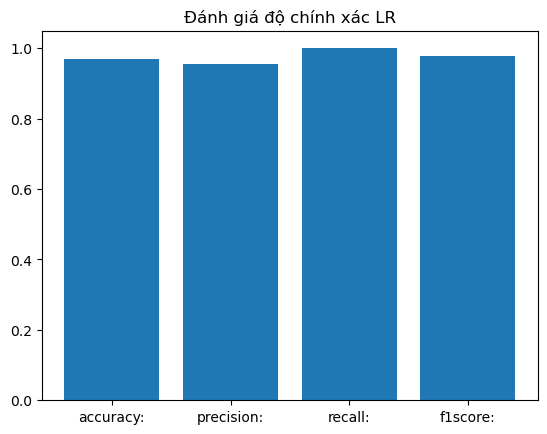

In [9]:
y_pred = model.predict(X_test)
pred=model.predict(X_test)

accuracy=accuracy_score (y_test, y_pred)
precision=precision_score (y_test, y_pred)
recall=recall_score (y_test, y_pred, average="binary")
f1score=f1_score (y_test, y_pred, average="binary")


evaluation = {
    "accuracy:" :accuracy,
    "precision:" :precision,
    "recall:": recall,
    "f1score:": f1score
}
fig, ax = plt.subplots()
ax.bar(evaluation.keys(), evaluation.values())
ax.set(title="Đánh giá độ chính xác LR")

print('Accuracy:', accuracy)
print('Precision:', precision)

### Tiến hành test model

In [4]:
import numpy as np
#không
# Load the model
model = pickle.load(open('LR.h5', 'rb'))
new_data = np.array([[48.0, 80.0, 1.02, 1.0, 0.0, 1, 1, 0, 0, 121.0, 36.0, 1.2,0,0, 15.4, 44, 7800, 5.2, 1, 1, 0, 1, 0, 0]])

prediction = model.predict(new_data)

if prediction == 0:
    print("Khách hàng không bị bệnh thận.")
else:
    print("Khách hàng bị bệnh thận.")


Khách hàng không bị bệnh thận.


In [5]:
import numpy as np
import pickle
#bị
# Load the model
model = pickle.load(open('LR.h5', 'rb'))

new_data = np.array([[47.0, 80, 1.025, 0, 0, 1, 1, 0, 0, 124, 44, 1, 140, 4.9, 14.9, 41, 7000, 5.7, 1, 1, 0, 1, 0, 0]])

# Perform the prediction
prediction = model.predict(new_data)

# Display the prediction result
if prediction == 0:
    print("Khách hàng không bị bệnh thận.")
else:
    print("Khách hàng bị bệnh thận.")


Khách hàng bị bệnh thận.


### Lưu model LR

In [12]:
filename = 'LR.h5'
pickle.dump(model, open(filename, 'wb'))